In [1]:
import os
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from PIL import Image


In [2]:
# Paths to the dataset folders
base_path = r'D:\AI Algorithm\Castor'
categories = ['infected spikes', 'healthy spikes']

image_size = (64, 64)  # Resize all images to 64x64 pixels
X = []  # Feature list
y = []  # Labels list

for category in categories:
    folder_path = os.path.join(base_path, category)
    label = categories.index(category)  # 0 for Healthy, 1 for Unhealthy
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)
            img_array = np.array(img).flatten()  # Flatten the image to a 1D array
            X.append(img_array)
            y.append(label)
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")


Error loading image 20241119_112924.mp4: cannot identify image file 'D:\\AI Algorithm\\Castor\\infected spikes\\20241119_112924.mp4'


C:\Users\Anurag\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Anurag\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


In [3]:
X = np.array(X)  # Convert list to numpy array
y = np.array(y)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
print("Model training complete!")


Model training complete!


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

# Predict on the test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate regression-style metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")
print(f"R^2 Score: {r2:.2f}")


Accuracy: 0.95
Precision: 0.89
Recall: 0.91
F1-Score: 0.90
AUC: 0.98
Confusion Matrix:
[[493  18]
 [ 14 148]]
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.22
Explained Variance Score: 0.74
R^2 Score: 0.74


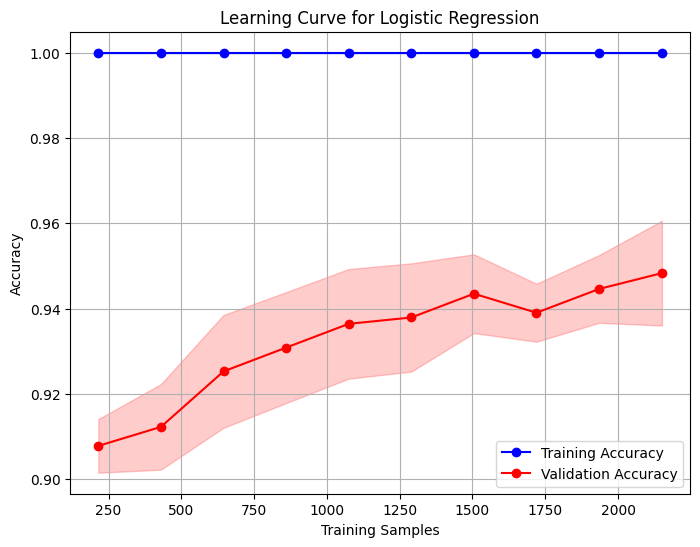

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from your dataset

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    logistic_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='red', marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='red', alpha=0.2)
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()